In [4]:
# pip install --force-reinstall  timm==0.4.12 torch==1.13.0 torchaudio==0.13.0
# need  cu116
# pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu116
# https://github.com/AUTOMATIC1111/stable-diffusion-webui/issues/9747
# https://www.kaggle.com/code/amarlove/midas-image-depth-estimation

In [1]:
import cv2
print(cv2.getBuildInformation())


General configuration for OpenCV 4.5.5 =====================================
  Version control:               4.5.5

  Platform:
    Timestamp:                   2021-12-28T06:21:01Z
    Host:                        Windows 10.0.17763 AMD64
    CMake:                       3.22.1
    CMake generator:             Visual Studio 14 2015
    CMake build tool:            MSBuild.exe
    MSVC:                        1900
    Configuration:               Debug Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      AVX2 (31 files):           + SSSE3 SSE4_1 

In [1]:
import sys
print(sys.version)

3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]


In [2]:
import sys
print(sys.executable)

C:\Users\Ksenia\AppData\Local\Programs\Python\Python39\python.exe


In [3]:
import cv2
import torch
import matplotlib.pyplot as plt

In [4]:
torch.cuda.is_available()
device = torch.device("cpu") # cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cpu


In [5]:
model_type = 'MiDaS_small' # "DPT_Large" 
midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in C:\Users\Ksenia/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\Ksenia/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


In [6]:
midas.to(device)
midas.eval()

MidasNet_small(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2dSameExport(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
      (3): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU6(inplace=True)
          (se): Identity()
          (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity()
        )
      )
      (4): Sequential(
        (0): InvertedResidual(
          (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(144,

In [7]:
transforms = torch.hub.load('intel-isl/MiDaS', 'transforms')
transform = transforms.small_transform

Using cache found in C:\Users\Ksenia/.cache\torch\hub\intel-isl_MiDaS_master


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1268: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


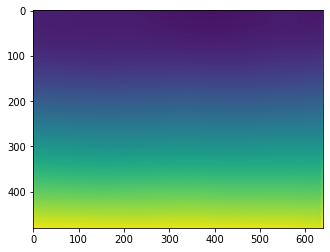

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    imgbatch = transform(img).to(device)
    with torch.no_grad():
        prediction = midas(imgbatch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size = img.shape[:2],
            mode = 'bicubic',
            align_corners = False
        ).squeeze()
        output = prediction.cpu().numpy()
    plt.imshow(output)
    cv2.imshow('CV2Frame', frame)
    plt.pause(0.0001)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        
plt.show()

In [ ]:
# next using rbg image and depth map make a 3d. there are 2 methods

Optical Flow: This technique analyzes the apparent motion of objects, surfaces, or edges in a sequence of images. It can estimate the motion between two consecutive frames, but it generally provides the camera's motion relative to its immediate previous position, not the absolute trajectory.

SLAM (Simultaneous Localization and Mapping): SLAM is more advanced and is designed specifically for mapping an environment and tracking the camera's or robot's location within it. It simultaneously builds a map of the environment (using the depth information from your images) and tracks the camera's position within this map.

There are several Python implementations of SLAM (Simultaneous Localization and Mapping) available, which can be a great starting point for understanding and implementing SLAM in your projects. Here are a few examples:

SLAM-python by DanielsKraus: This GitHub repository provides an implementation of SLAM written in Python. It seems to be a straightforward implementation suitable for educational purposes.

SLAM using OpenCV and NumPy by Filchy: This repository offers a SLAM implementation utilizing OpenCV and NumPy, which could be more aligned with your requirement of using OpenCV for depth image processing​​.

FastSLAM1.0 — PythonRobotics: This is an implementation of FastSLAM 1.0 as part of the PythonRobotics project. It provides a feature-based SLAM example with detailed code and explanations, making it a good resource for learning and experimentation​​.

https://github.com/DanielsKraus/SLAM-python
https://github.com/filchy/slam-python
https://atsushisakai.github.io/PythonRobotics/modules/slam/FastSLAM1/FastSLAM1.html

Although SLAM method is usually used to track position of robotic system, it's applicable for 3D reconstruction